## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [92]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [93]:
df = pd.read_csv('QueryResults (1).csv')
df.rename(columns={'Unnamed: 2': 'Posts',
                   'm': 'Time Period (months)',
                   'TagName': 'Computing Language',}, inplace=True)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [94]:
df.head()

,Time Period (months),Computing Language,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [95]:
df.tail()

,Time Period (months),Computing Language,Posts
2784,2025-04-01 00:00:00,php,267
2785,2025-04-01 00:00:00,python,1805
2786,2025-04-01 00:00:00,r,408
2787,2025-04-01 00:00:00,ruby,32
2788,2025-04-01 00:00:00,swift,225


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [96]:
df.shape

(2789, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [97]:
df.count()

,0
Time Period (months),2789
Computing Language,2789
Posts,2789


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [98]:
total_posts = sum(list(df['Posts']))
print(f"Total number of posts per language (all time): {total_posts}")

lang_with_highest_posts = df['Posts'].idxmax()
info = list(df.loc[lang_with_highest_posts])
print("\n")
print(info)
print("\n")
print(f"Language with Highest Number of Posts (all time): {info[1]}, Number of Posts: {int(info[2])}")

Total number of posts per language (all time): 12289372


['2020-05-01 00:00:00', 'python', np.int64(29316)]


Language with Highest Number of Posts (all time): python, Number of Posts: 29316


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [99]:
df.groupby('Computing Language').count()

,Time Period (months),Posts
Computing Language,,
assembly,201,201
c,201,201
c#,202,202
c++,201,201
delphi,201,201
go,186,186
java,201,201
javascript,201,201
perl,201,201


In [100]:
result = df.groupby('Computing Language').count()
lang_with_fewest_months_df = result.sort_values('Time Period (months)', ascending=True).head(1)
dict_of_info = lang_with_fewest_months_df.to_dict()
print(dict_of_info)
print("\n")
print(f"Language with fewest months with an entry: 'go', Number of months: {dict_of_info['Time Period (months)']['go']}")

{'Time Period (months)': {'go': 186}, 'Posts': {'go': 186}}


Language with fewest months with an entry: 'go', Number of months: 186


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [101]:
df['Time Period (months)'] = pd.to_datetime(df['Time Period (months)'])

In [102]:
df.head()

,Time Period (months),Computing Language,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [103]:
reshaped_df = df.pivot(index='Time Period (months)', columns='Computing Language', values='Posts')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [104]:
reshaped_df.shape

(202, 14)

In [105]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Computing Language')

In [106]:
reshaped_df.head()

Computing Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Time Period (months),,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1638.0,753.0,104.0,NaN,1122.0,629.0,129.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,303.0,1983.0,805.0,112.0,NaN,1145.0,720.0,128.0,602.0,504.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,953.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [107]:
reshaped_df.count()

,0
Computing Language,
assembly,201
c,201
c#,202
c++,201
delphi,201
go,186
java,201
javascript,201
perl,201


In [108]:
reshaped_df.fillna(0, inplace=True)

In [109]:
reshaped_df.head()

Computing Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Time Period (months),,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1638.0,753.0,104.0,0.0,1122.0,629.0,129.0,473.0,534.0,6.0,285.0,0.0
2008-10-01,16.0,303.0,1983.0,805.0,112.0,0.0,1145.0,720.0,128.0,602.0,504.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,953.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [110]:
reshaped_df.count()

,0
Computing Language,
assembly,202
c,202
c#,202
c++,202
delphi,202
go,202
java,202
javascript,202
perl,202


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [111]:
java_df = reshaped_df['java']
java_df.head()

,java
Time Period (months),
2008-07-01,0.0
2008-08-01,220.0
2008-09-01,1122.0
2008-10-01,1145.0
2008-11-01,953.0


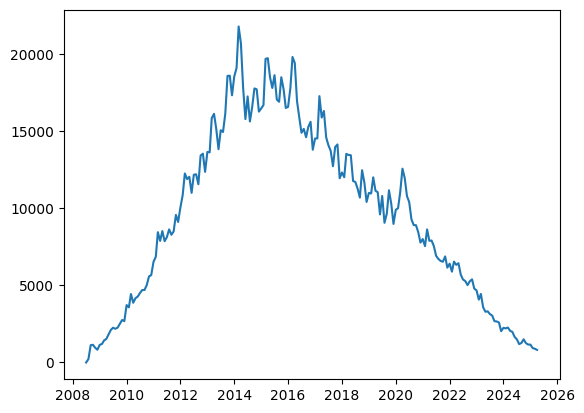

In [112]:
plt.plot(java_df.index, java_df.values, data=java_df)

In [113]:
python_df = reshaped_df['python']
python_df.head()

,python
Time Period (months),
2008-07-01,0.0
2008-08-01,119.0
2008-09-01,534.0
2008-10-01,504.0
2008-11-01,447.0


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

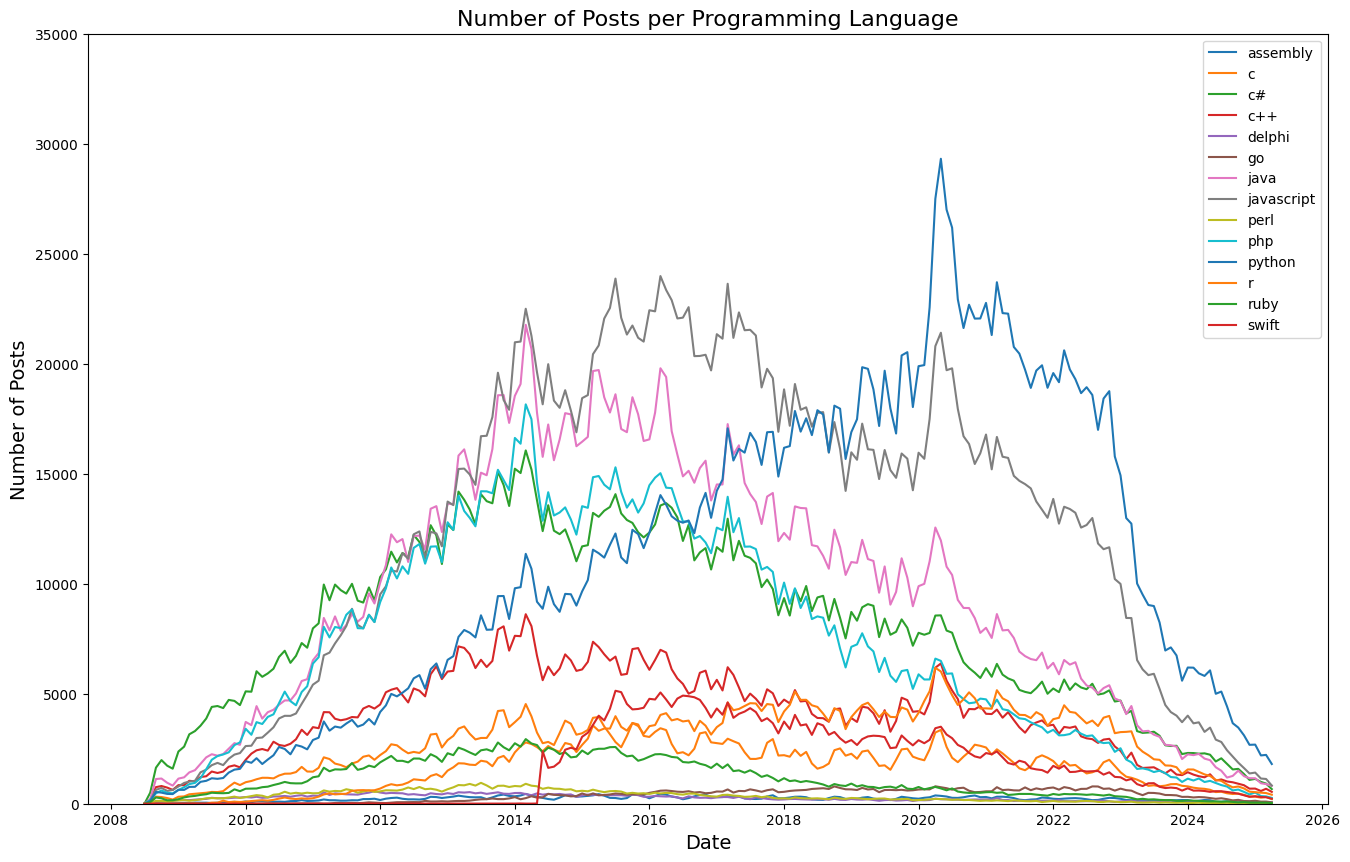

In [114]:
# Style plot
plt.figure(figsize=(16,10))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("Number of Posts per Programming Language", fontsize=16)
plt.ylim(0, 35000)

# graph the data
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column)

plt.legend()
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [119]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=4).mean()

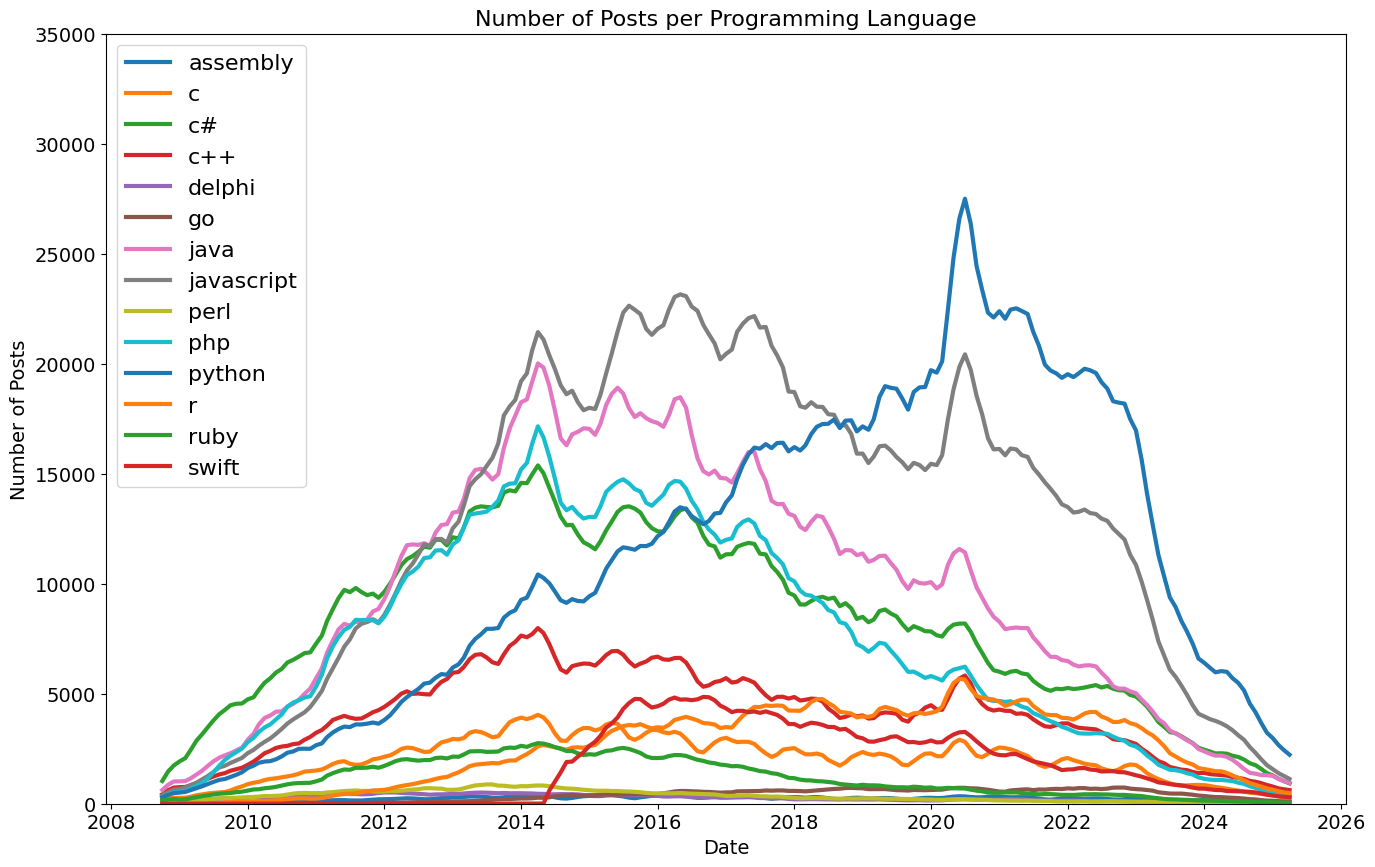

In [120]:
# Style plot
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Number of Posts per Programming Language', fontsize=16)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)
plt.show()